In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"Downloads\ad.csv")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,91.43,39,46964.11,209.91,Organic motivating model,West Carmenfurt,1,French Polynesia,07-07-2016 03:55,0
1,91.37,45,51920.49,182.65,Re-engineered composite moratorium,Lawsonshire,1,Kazakhstan,01-04-2016 07:37,1
2,91.15,38,36834.04,184.98,Robust uniform framework,Joshuamouth,0,Cyprus,22-02-2016 07:04,0
3,91.10,40,55499.69,198.13,Secured intermediate approach,Michaelmouth,1,Bolivia,07-03-2016 22:51,0
4,90.97,37,54520.14,180.77,Multi-lateral empowering throughput,Kimberlytown,0,Congo,16-02-2016 18:21,0


In [4]:
df.shape

(1000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
#data and time conversion
df['Timestamp']=pd.to_datetime(df.Timestamp)


In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


In [9]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [10]:
df[df.duplicated()].sum()

Daily Time Spent on Site    0.0
Age                         0.0
Area Income                 0.0
Daily Internet Usage        0.0
Ad Topic Line               0.0
City                        0.0
Male                        0.0
Country                     0.0
Timestamp                   0.0
Clicked on Ad               0.0
dtype: float64

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


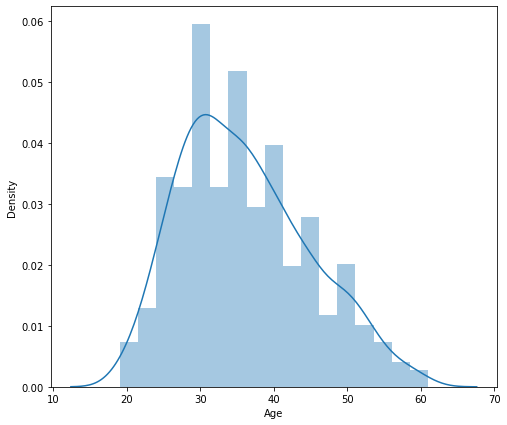

In [11]:
plt.figure(figsize=(8,7))
sns.distplot(df.Age)
plt.show()

In [12]:
df['Area_income']=df.iloc[:,2]

In [13]:
df.drop('Area Income',axis=1,inplace=True)

In [14]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Daily Internet Usage',
       'Ad Topic Line', 'City', 'Male', 'Country', 'Timestamp',
       'Clicked on Ad', 'Area_income'],
      dtype='object')

C:\Users\GUDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


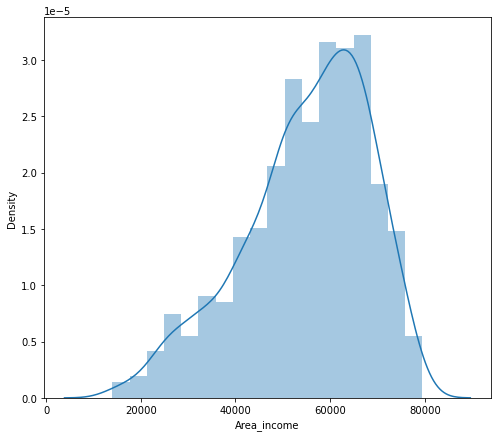

In [15]:
plt.figure(figsize=(8,7))
sns.distplot(df.Area_income)
plt.show()

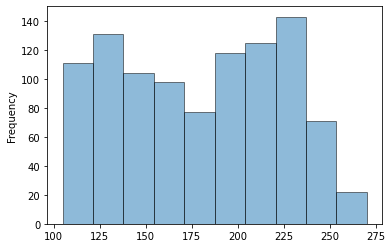

In [16]:
df['Daily Internet Usage'].plot(kind='hist',alpha=0.5,ec='black')
plt.show()

<Figure size 720x576 with 0 Axes>

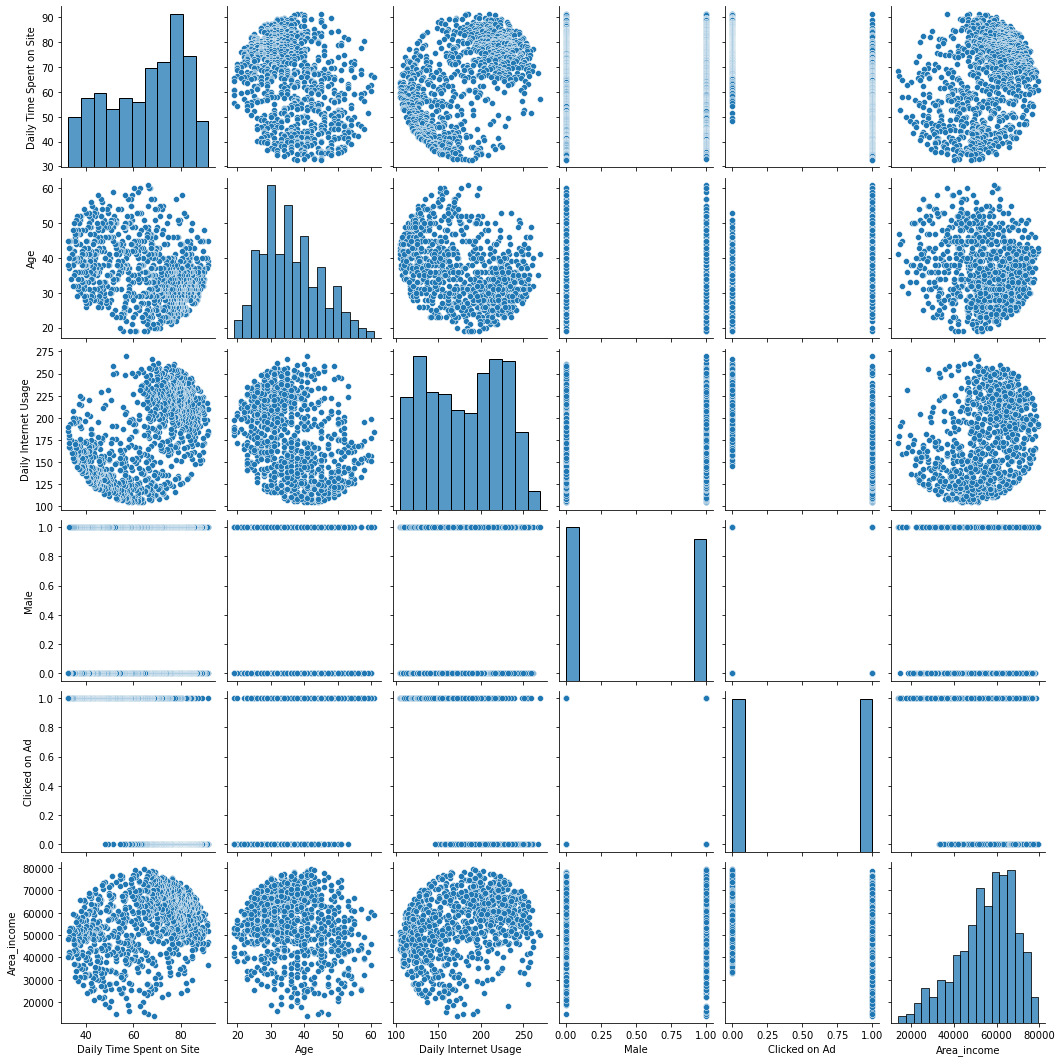

In [17]:
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

In [18]:
df.Area_income.median()

57012.3

In [19]:
#outliers
outliers=df.select_dtypes(exclude=object)


In [20]:
for i in outliers:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lowerbound=q1-1.5*iqr
    upperbound=q3+1.5*iqr
    print('iqr of',i,'=',iqr)
    print('lowerbound of',i,'=',lowerbound)
    print('upperbound of',i,'=',upperbound)
    print('Total outliers',i,'=',(df.shape[0]-df[(df[i]<upperbound)&(df[i]>lowerbound)].shape[0]))


iqr of Daily Time Spent on Site = 27.1875
lowerbound of Daily Time Spent on Site = 10.57875
upperbound of Daily Time Spent on Site = 119.32875
Total outliers Daily Time Spent on Site = 0
iqr of Age = 13.0
lowerbound of Age = 9.5
upperbound of Age = 61.5
Total outliers Age = 0
iqr of Daily Internet Usage = 79.9625
lowerbound of Daily Internet Usage = 18.886250000000004
upperbound of Daily Internet Usage = 338.73625000000004
Total outliers Daily Internet Usage = 0
iqr of Male = 1.0
lowerbound of Male = -1.5
upperbound of Male = 2.5
Total outliers Male = 0
iqr of Timestamp = 120 days 15:54:30
lowerbound of Timestamp = 2015-09-03 23:31:15
upperbound of Timestamp = 2016-12-29 15:09:15
Total outliers Timestamp = 0
iqr of Clicked on Ad = 1.0
lowerbound of Clicked on Ad = -1.5
upperbound of Clicked on Ad = 2.5
Total outliers Clicked on Ad = 0
iqr of Area_income = 18438.832500000004
lowerbound of Area_income = 19373.553749999992
upperbound of Area_income = 93128.88375000001
Total outliers Area_

In [21]:
df.Country.unique()

array(['French Polynesia', 'Kazakhstan', 'Cyprus', 'Bolivia', 'Congo',
       'Togo', 'Maldives', 'Lesotho', 'Bahrain', 'Armenia', 'Australia',
       'Paraguay', 'Reunion', 'Nepal', 'Fiji',
       'Falkland Islands (Malvinas)', 'Bhutan', 'Myanmar', 'Cook Islands',
       'Bulgaria', 'Slovakia (Slovak Republic)', 'Zambia', 'Gibraltar',
       'Saint Vincent and the Grenadines', 'Cambodia', 'France',
       'Turkmenistan', 'Heard Island and McDonald Islands', 'Estonia',
       'Korea', 'Christmas Island', 'Bosnia and Herzegovina',
       'American Samoa', 'Madagascar', 'China', 'Western Sahara',
       'Timor-Leste', 'United States of America', 'Syrian Arab Republic',
       'Chad', 'Costa Rica', 'Mexico', 'Greece', 'Aruba', 'Singapore',
       'Bouvet Island (Bouvetoya)', 'French Southern Territories',
       'Swaziland', 'Morocco', 'Saudi Arabia', 'Iran', 'Burundi', 'Samoa',
       'Tokelau', 'Sri Lanka', 'Netherlands Antilles', 'Ecuador',
       'Burkina Faso', 'Senegal', 'Philippine

In [22]:
df.City.unique()

array(['West Carmenfurt', 'Lawsonshire', 'Joshuamouth', 'Michaelmouth',
       'Kimberlytown', 'Lake Joseph', 'Wallacechester', 'West Tanner',
       'Sarafurt', 'Nicholasport', 'Port Stacey', 'Wendyton',
       'Lake Cynthia', 'Rickymouth', 'Townsendfurt', 'Stewartbury',
       'Jordanmouth', 'Lake Jessica', 'Brandonstad', 'East Deborahhaven',
       'Cannonbury', 'East Johnport', 'East John', 'Hurleyborough',
       'Lake Deborahburgh', 'West Roytown', 'Port Brianfort',
       'New Patriciashire', 'Meyerchester', 'Millerview', 'Carsonshire',
       'North Loriburgh', 'Pamelamouth', 'West Melissashire', 'New Paul',
       'Lake Kevin', 'West Andrew', 'Blairville', 'East Donnatown',
       'Wadestad', 'Luischester', 'Joshuaburgh', 'New Steve',
       'Lawrenceborough', 'South Jennifer', 'New Jessicaport',
       'Henryfort', 'Colemanshire', 'Lake Melindamouth', 'Rhondaborough',
       'Lopezmouth', 'North Leonmouth', 'Timothytown',
       'New Jeffreychester', 'Lake Annashire', 'Jonesl

In [23]:
df

,Daily Time Spent on Site,Age,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Area_income
0,91.43,39,209.91,Organic motivating model,West Carmenfurt,1,French Polynesia,2016-07-07 03:55:00,0,46964.11
1,91.37,45,182.65,Re-engineered composite moratorium,Lawsonshire,1,Kazakhstan,2016-01-04 07:37:00,1,51920.49
2,91.15,38,184.98,Robust uniform framework,Joshuamouth,0,Cyprus,2016-02-22 07:04:00,0,36834.04
3,91.10,40,198.13,Secured intermediate approach,Michaelmouth,1,Bolivia,2016-07-03 22:51:00,0,55499.69
4,90.97,37,180.77,Multi-lateral empowering throughput,Kimberlytown,0,Congo,2016-02-16 18:21:00,0,54520.14
...,...,...,...,...,...,...,...,...,...,...
995,32.99,45,177.46,Phased full-range hardware,Masseyshire,0,Ecuador,2016-04-30 19:42:00,1,49282.87
996,32.91,37,181.02,Future-proofed fresh-thinking conglomeration,Elizabethstad,0,South Africa,2016-07-17 14:26:00,1,51691.55
997,32.84,40,171.72,Triple-buffered 3rdgeneration migration,New Keithburgh,0,Trinidad and Tobago,2016-10-03 01:36:00,1,41232.89
998,32.60,45,185.47,Multi-tiered interactive neural-net,New Henry,0,Mayotte,2016-02-05 18:37:00,1,48206.04


In [24]:
df.drop('Ad Topic Line',axis=1,inplace=True)

In [25]:
df.drop(['City','Country'],axis=1,inplace=True)


In [26]:
df.drop('Timestamp',axis=1,inplace=True)

In [27]:
x=df.drop('Clicked on Ad',axis=1).values

In [28]:
y=df['Clicked on Ad'].values

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dt=DecisionTreeClassifier(max_depth=9)

In [127]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [128]:
dt.score(x_train,y_train)

0.9946666666666667

In [129]:
dt.score(x_test,y_test)

0.92

In [130]:
from sklearn import metrics

In [131]:
print(metrics.classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       123
           1       0.95      0.89      0.92       127

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [132]:
metrics.confusion_matrix(y_test,dt.predict(x_test))

array([[117,   6],
       [ 14, 113]], dtype=int64)

In [40]:
from sklearn.svm import SVC

In [41]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [42]:
svm.score(x_test,y_test)

0.748

In [43]:
svm.score(x_train,y_train)

0.704

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
randomforest=RandomForestClassifier(max_depth=7,random_state=3)
randomforest.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, random_state=3)

In [158]:
randomforest.score(x_test,y_test)

0.948

In [159]:
randomforest.score(x_train,y_train)

0.9933333333333333

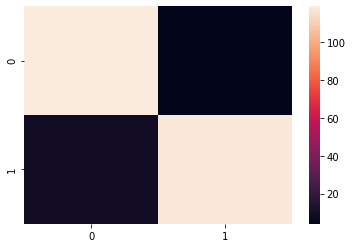

In [162]:
sns.heatmap(metrics.confusion_matrix(y_test,randomforest.predict(x_test)))
plt.show()

In [152]:
print(metrics.classification_report(y_test,randomforest.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       123
           1       0.97      0.93      0.95       127

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [122]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [80]:
lr.score(x_test,y_test)

0.888

In [57]:
lr.score(x_train,y_train)

0.8986666666666666

In [58]:
metrics.confusion_matrix(y_test,lr.predict(x_test))

array([[117,   6],
       [ 22, 105]], dtype=int64)